# Rotten Tomatoes movie review - Weekly Project


The Rotten Tomatoes movie review dataset is a corpus of movie reviews used for sentiment analysis

This competition presents a chance to benchmark your sentiment-analysis ideas on the Rotten Tomatoes dataset. You are asked to label phrases on a scale of five values: 
- negative
- somewhat negative
- neutral
- somewhat positive
- positive. 

Obstacles like sentence negation, sarcasm, terseness, language ambiguity, and many others make this task very challenging.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


sns.set_style("whitegrid")
pd.options.display.max_colwidth = 100

## Data manipulation and Exploration

In [2]:
df = pd.read_csv('/Users/thinhcn/Desktop/Coder school/2. CS practice/Data/train.csv')
df.head()

,Unnamed: 0,PhraseId,SentenceId,Phrase,Sentiment
0,0,122,4,positively,3
1,1,19366,851,disguise the slack complacency of -LRB- Godard 's -RRB- vision,1
2,2,54763,2726,realizes a fullness that does not negate the subject .,3
3,3,89708,4667,sealed,2
4,4,33494,1571,Go Where We Went 8 Movies Ago,3


In [3]:
# Clean data, drop Unnamed: 0
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df

,PhraseId,SentenceId,Phrase,Sentiment
0,122,4,positively,3
1,19366,851,disguise the slack complacency of -LRB- Godard 's -RRB- vision,1
2,54763,2726,realizes a fullness that does not negate the subject .,3
3,89708,4667,sealed,2
4,33494,1571,Go Where We Went 8 Movies Ago,3
...,...,...,...,...
117040,109994,5826,It 's a boom-box of a movie that might have been titled ` The Loud and the Ludicrous ' ... the p...,2
117041,85413,4417,advantages,2
117042,133250,7189,a conventional way,2
117043,130334,7021,"like Kubrick before him , may not touch the planet 's skin , but understands the workings of its...",3


In [4]:
df.describe()

,PhraseId,SentenceId,Sentiment
count,117045.000000,117045.000000,117045.000000
mean,77978.912880,4076.819394,2.063232
std,45032.942036,2501.672440,0.892677
min,1.000000,1.000000,0.000000
25%,38966.000000,1859.000000,2.000000
50%,77924.000000,4009.000000,2.000000
75%,116955.000000,6239.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [5]:
# Total number of sentences
print(f'Number of sentences: {df.SentenceId.nunique()}')

Number of sentences: 8512


In [6]:
# All are unique phraseid
print(f'Duplicated Phrase ID: {df.PhraseId.duplicated().sum()}')

# No duplicated phrase
print(f'Duplicated Phrase: {df.Phrase.duplicated().sum()}')

Duplicated Phrase ID: 0
Duplicated Phrase: 0


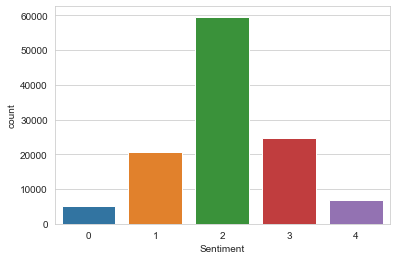

In [7]:
# Visualize data:  normal distribution, mode is 2

sns.countplot(data = df, x = 'Sentiment')
plt.show()

### Investigating into phrases

In [8]:
df['wordcount'] =  df.Phrase.apply(lambda x: len(list(x.split())))
df.sort_values(by = ['SentenceId', 'wordcount'], ascending = [True, False])

,PhraseId,SentenceId,Phrase,Sentiment,wordcount
89805,1,1,A series of escapades demonstrating the adage that what is good for the goose is also good for t...,1,37
48910,28,1,"is also good for the gander , some of which occasionally amuses but none of which amounts to muc...",2,23
81011,29,1,"is also good for the gander , some of which occasionally amuses but none of which amounts to muc...",2,22
29991,33,1,"for the gander , some of which occasionally amuses but none of which amounts to much of a story",2,19
82683,39,1,some of which occasionally amuses but none of which amounts to much of a story,2,15
...,...,...,...,...,...
13024,156058,8544,avuncular chortles,3,2
21102,156053,8544,sadness and,1,2
15663,156060,8544,chortles,2,1
29221,156059,8544,avuncular,2,1


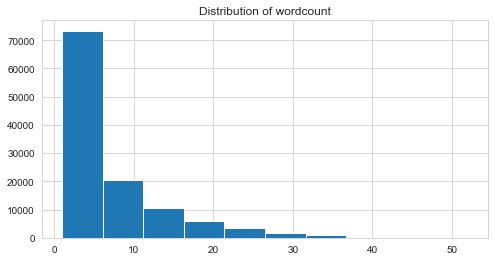

In [9]:

fig = plt.figure(figsize = (8,4))
plt.hist(data = df, x = 'wordcount', bins = 10)
plt.title('Distribution of wordcount')
plt.show()

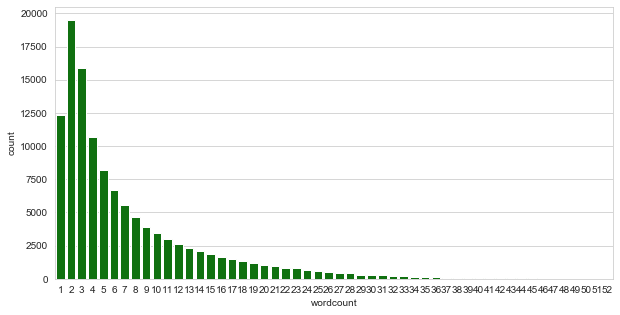

In [10]:
fig = plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'wordcount', color = 'green')
plt.show()

- Most of the phrases are made of <= 10 words, particulaly 2, 3, 1, 4 words (>10000)
- We may consider to split the phrase into groups of more than 1 word each (ngrams = (1,2), for example)


In [11]:
df[df.SentenceId == 1]

,PhraseId,SentenceId,Phrase,Sentiment,wordcount
1006,53,1,which amounts to much of a story,2,7
8396,50,1,none of which amounts to much of a story,1,9
11838,58,1,much of a story,2,4
15143,42,1,of which,2,2
15476,55,1,amounts,2,1
19243,30,1,is also,2,2
20796,14,1,the,2,1
22714,36,1,the gander,2,2
29718,4,1,A,2,1
29991,33,1,"for the gander , some of which occasionally amuses but none of which amounts to much of a story",2,19


### Some highlights:
    - Each phrase is extracted from a sentence out of the context.
    - The sentiment is for the individual Phrase only, not related to the sentence the phrase belongs to.
    - Phrases can be among stop words (for example: that, non, of,...), 
    - Moreover, 'good for the goose' gets a score of 3 while 'is good for the goose' gets 2, this means the stop word 'is' lessen the weight of other words in the phrase
     ==> thefore, we may consider to include stop-words for a better train
    
    
    

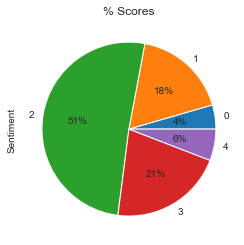

In [12]:
((df.groupby('Sentiment')['Sentiment'].count()/df.shape[0])*100).plot(kind='pie',figsize=(4,4),title='% Scores', autopct='%1.0f%%')
plt.show()

- A dummy-predictions of 2 may get ~ accuracy based on the distribution of this data ( assuming that the test set has the same distribution)

## Preprocessing

### 1. Using Regrex to remove special chars

In [40]:
import re

def preprocessor(text):
    """ Return a cleaned version of text
    """
    
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    
    # Remove any non-word character and append the emoticons + Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    # text=re.sub("\\s+(in|the|all|for|and|on)\\s+"," _connector_ ",text) # normalize certain words
    
    return text

# Testing
preprocessor('you ah @$ : )')

'you ah  '

### 2. Stemming and Lemmatize
-  PorterStemmer
- SnowballStemmer
- LancasterStemmer

In [14]:

from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer 

In [15]:
porter = PorterStemmer()
englishStemmer=SnowballStemmer("english")
lemmatizer = WordNetLemmatizer() 

# Split a text into list of words
def tokenizer(text):
    return text.split()

# Split a text into list of words and apply stemming and lemmatizing technic
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

def tokenizer_snowball(text):
    return [englishStemmer.stem(word) for word in text.split()]

def tokenizer_lemmatize(text):
    return [lemmatizer.lemmatize(word) for word in text.split()]

### 3. Stop Words
- stop_words contain many negating words such as `"aren't",'couldn', "couldn't", 'didn', "didn't", 'doesn',"doesn't",'isn',...`
that could affect the meaning, in this case, we need to keep the words

In [16]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words[100:110]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thinhcn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each']

In [17]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
# notice how the "very good" get a score of 4

df[(df.Phrase.str.contains('good')) & (df.wordcount == 2)]

,PhraseId,SentenceId,Phrase,Sentiment,wordcount
143,146587,7973,good sportsmanship,3,2
245,48696,2377,for good,3,2
355,5661,224,good things,3,2
1146,17770,771,good gossip,3,2
2015,116682,6221,good noir,3,2
...,...,...,...,...,...
111823,118341,6321,become good,3,2
112509,32387,1518,really good,4,2
113889,9154,382,good actors,3,2
113953,104282,5501,good pace,4,2


## Train logistic Regression
- CountVectorize

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 1. Split data into train, validation 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df['Phrase']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)
X_train.shape, X_test.shape

((93636,), (23409,))

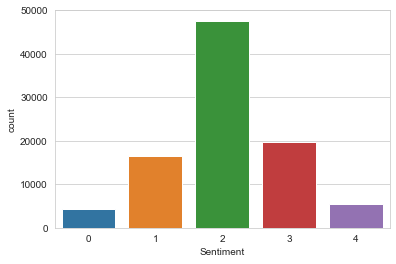

In [22]:
# making sure that our train set is of the same distrubution with the dataset
trainset = pd.concat([X_train,y_train], axis = 1)
sns.countplot(data = trainset, x = 'Sentiment')
plt.show()

### 2. Data Vectorization with `CountVectorizer()`

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
# create an instance
count = CountVectorizer(
                     #stop_words=stop_word_reduced,
                       tokenizer=tokenizer_snowball,
                       preprocessor=preprocessor,
                       ngram_range=(1,2), binary = True
                        )

# Pipeline

clf = Pipeline([('vect', count),
                ('clf', LogisticRegression(random_state=2,  max_iter = 200))])

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

predictions = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))

predictions_Xtrain = clf.predict(X_train)
print('accuracy of X_train:',accuracy_score(y_train,predictions_Xtrain))

accuracy: 0.6626083984792174
accuracy of X_train: 0.849203297876885


In [25]:
# Now apply other metrics to evaluate the model

print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

confusion matrix:
 [[  348   495   155    11     0]
 [  333  1891  1756    94    12]
 [   68   831 10144   880    42]
 [    6    97  1900  2612   367]
 [    1     6   122   685   553]]
classification report:
               precision    recall  f1-score   support

           0       0.46      0.34      0.39      1009
           1       0.57      0.46      0.51      4086
           2       0.72      0.85      0.78     11965
           3       0.61      0.52      0.56      4982
           4       0.57      0.40      0.47      1367

    accuracy                           0.66     23409
   macro avg       0.59      0.52      0.54     23409
weighted avg       0.65      0.66      0.65     23409



Text(0.5, 16.0, 'Predicted label')

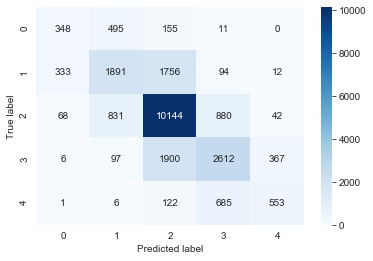

In [26]:
cm = confusion_matrix(y_test, predictions)
# view with a heatmap
sns.heatmap(cm, annot=True,fmt='g', cmap='Blues', xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [27]:
(abs(y_test - predictions)).mean()

0.3636208295954547

Interpretation:
    - The model works well a mean diffrence of less than 0.4 compared to the label
    - Most of the wrong scores are + or - 1 compared to the right label
    - Label 1, the model mislabled it to 2 (>43%)
    - Label 3, the model mislabeled it to 2 (>38%)
    - Label 4, the model failed to label nearly 60% 


In [28]:
ax = cm.sum(axis = 1).reshape(-1,1)
np.round(cm/ax,3)*100

array([[34.5, 49.1, 15.4,  1.1,  0. ],
       [ 8.1, 46.3, 43. ,  2.3,  0.3],
       [ 0.6,  6.9, 84.8,  7.4,  0.4],
       [ 0.1,  1.9, 38.1, 52.4,  7.4],
       [ 0.1,  0.4,  8.9, 50.1, 40.5]])

In [29]:
compare = pd.DataFrame({"Phrase": X_test, "Actual":y_test, "Predict": predictions})
compare[(compare.Actual ==4) &(compare.Predict != 4)]

,Phrase,Actual,Predict
110714,have been one of the more daring and surprising American movies of the year,4,3
86417,"is clever , offbeat and even gritty enough to overcome my resistance .",4,3
100726,insanely funny,4,3
107302,adored,4,2
60716,is the kind of engaging historical drama that Hollywood appears to have given up on in favor of ...,4,3
...,...,...,...
66826,should not be missed .,4,2
36470,brilliantly played,4,3
94200,"is deceptively simple , deeply satisfying .",4,3
43993,"very compelling ,",4,3


In [30]:
df[df.Phrase.str.contains('very compelling')]

,PhraseId,SentenceId,Phrase,Sentiment,wordcount
225,106779,5640,tells this very compelling tale with little fuss or noise,3,10
4667,106775,5640,"Miller tells this very compelling tale with little fuss or noise , expertly plucking tension fro...",3,18
5339,76799,3949,"a very compelling , sensitive , intelligent and almost cohesive piece of film entertainment",4,14
13259,76808,3949,very compelling,3,2
16313,76806,3949,"very compelling , sensitive",3,4
22388,82716,4272,"'s sincere to a fault , but , unfortunately , not very compelling or much fun",1,16
30810,106781,5640,this very compelling tale,3,4
43993,76807,3949,"very compelling ,",4,3
47583,76805,3949,"very compelling , sensitive ,",4,5
54917,76778,3949,"Try as you might to scrutinize the ethics of Kaufman 's approach , somehow it all comes together...",4,35


In [31]:
# for a totally unknown data, the model tend to give it a neutral score of 2
clf.named_steps['clf'].intercept_

array([-1.91443585,  0.406308  ,  2.78966178,  0.57706785, -1.85860178])

## Save the model

In [42]:
# After validation, train model with all dataset 

clf.fit(X, y)
predictions_X = clf.predict(X)
print('accuracy:',accuracy_score(y,predictions_X))

accuracy: 0.8343372207270708


In [43]:
# Save model

import pickle
import os

pickle.dump(clf, open('logisticRegression.pkl', 'wb'))


In [44]:
test_set  = pd.read_csv('/Users/thinhcn/Desktop/Coder school/2. CS practice/Data/test.csv')
test_set

,PhraseId,Phrase
0,0,drag on
1,1,your average formulaic romantic quadrangle
2,2,another retelling
3,3,pinks
4,4,imaginative
...,...,...
39010,39010,get back
39011,39011,that fails on so many levels
39012,39012,"Ms. Ramsay and her co-writer ,"
39013,39013,"I was in the tiny two seater plane that carried the giant camera around Australia , sweeping and..."


In [45]:
predictions_test = clf.predict(test_set['Phrase'])
pd.DataFrame({"Sentiment": predictions_test})

,Sentiment
0,1
1,2
2,2
3,2
4,2
...,...
39010,2
39011,2
39012,2
39013,2


In [46]:
submission = pd.concat([test_set, pd.DataFrame({"Sentiment": predictions_test})], axis = 1)
submission

,PhraseId,Phrase,Sentiment
0,0,drag on,1
1,1,your average formulaic romantic quadrangle,2
2,2,another retelling,2
3,3,pinks,2
4,4,imaginative,2
...,...,...,...
39010,39010,get back,2
39011,39011,that fails on so many levels,2
39012,39012,"Ms. Ramsay and her co-writer ,",2
39013,39013,"I was in the tiny two seater plane that carried the giant camera around Australia , sweeping and...",2


In [47]:
submission.to_csv("Submission_final.csv", index= False)